In [47]:
# Load the ProfileDB model and deserialization utility.
import profiledb as pdb
# To use helpers, such as find(...) and geomean(...)
from profiledb.helpers import *
# To make use of matplotlib plotting utilities.
import profiledb.pyplot as pdbplt

%matplotlib inline

import matplotlib.pyplot as plt
import sys
sys.path.append('..')

In [48]:
profiledb = pdb.load('profiledb.json')
print('Loaded {} experiments...'.format(len(profiledb.experiments)))

Loaded 164 experiments...


In [50]:
print('Configuration keys:', profiledb.configkeys())
print('Input files:', profiledb.configvalues('input1'))
print('Plugins:', profiledb.configvalues('plugins'))
print('Iterations:', profiledb.configvalues('iterations'))
print('Tags: ', profiledb.tags())

Configuration keys: {'iterations', 'input1', 'sample', 'plugins', 'input2'}
Input files: {'hdfs://tenemhead2/data/rdf/dbpedia/dbpedia-2015/page-links-en-uris_de.sample_20pc.nt', 'hdfs://tenemhead2/data/rdf/dbpedia/dbpedia-2015/page-links-en-uris_de.sample_10pc.nt', 'hdfs://tenemhead2/data/rdf/dbpedia/dbpedia-2015/page-links-en-uris_de.sample_1pc.nt'}
Plugins: {'spark,basic-graph', 'java,graphchi', 'spark,java-conversions,java-graph', 'spark,java-conversions,graphchi', 'java,basic-graph', 'java,java-graph', 'spark,spark-graph'}
Iterations: {1, 10, 20, 5}
Tags:  {'2016-08-12-a-crocopr'}


In [51]:
styles = ['-', '--', '-.', ':', ',', '.', 'o', 'v', '^', '<', '>', '1', '2', '3', '4']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

plugins = profiledb.configvalues('plugins')
plugin2style = dict(zip(plugins, styles))
plugin2color = dict(zip(plugins, colors))
files = profiledb.configvalues('input1')
file2color = dict(zip(files, colors))

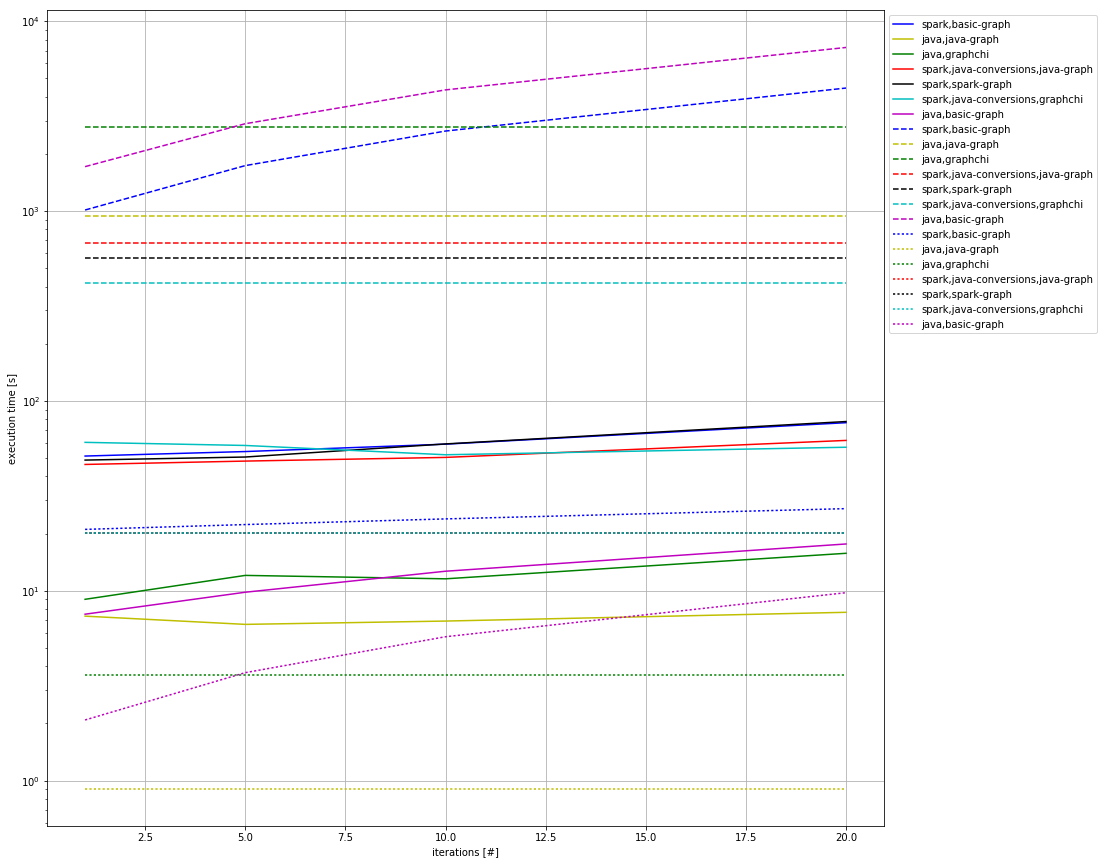

In [52]:
def keyfunc(exp): return exp.conf('plugins')
def xfunc(exp): return exp.conf('iterations')
def selfunc(exp): return '2016-08-12-a-crocopr' in exp.tags() and exp.conf('input1') == u'hdfs://tenemhead2/data/rdf/dbpedia/dbpedia-2015/page-links-en-uris_de.sample_1pc.nt'

iteract = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement('Execution')['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterlo = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement('Estimate 1 (lower)')['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterhi = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement('Estimate 1 (upper)')['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)

plt.figure(figsize = (15, 15))
for series in iteract:
    plt.plot(series.x, series.y, color = plugin2color[series.key], label = str(series.title))
for series in iterhi:
    plt.plot(series.x, series.y, color = plugin2color[series.key], linestyle = '--', label = str(series.title))
for series in iterlo:
    plt.plot(series.x, series.y, color = plugin2color[series.key], linestyle = ':', label = str(series.title))
plt.yscale('log')
plt.xlabel('iterations [#]')
plt.ylabel('execution time [s]')
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

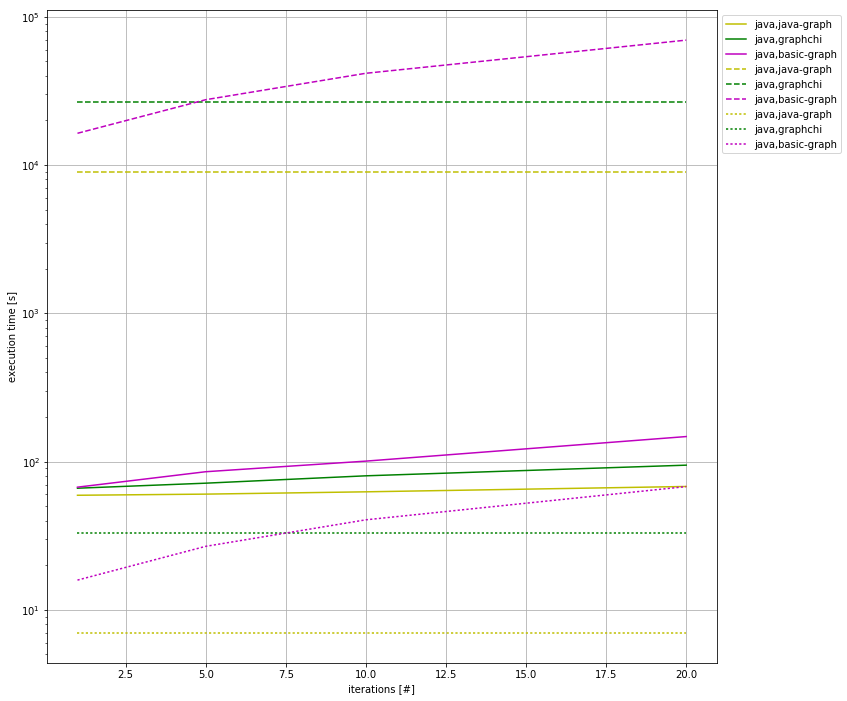

In [53]:
def keyfunc(exp): return exp.conf('plugins')
def xfunc(exp): return exp.conf('iterations')
def selfunc(exp): return '2016-08-12-a-crocopr' in exp.tags() and \
    exp.conf('input1') == u'hdfs://tenemhead2/data/rdf/dbpedia/dbpedia-2015/page-links-en-uris_de.sample_10pc.nt'

iteract = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement('Execution')['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterlo = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement('Estimate 1 (lower)')['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterhi = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement('Estimate 1 (upper)')['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)

plt.figure(figsize = (12, 12))
for series in iteract:
    plt.plot(series.x, series.y, color = plugin2color[series.key], label = str(series.title))
for series in iterhi:
    plt.plot(series.x, series.y, color = plugin2color[series.key], linestyle = '--', label = str(series.title))
for series in iterlo:
    plt.plot(series.x, series.y, color = plugin2color[series.key], linestyle = ':', label = str(series.title))
plt.yscale('log')
plt.xlabel('iterations [#]')
plt.ylabel('execution time [s]')
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

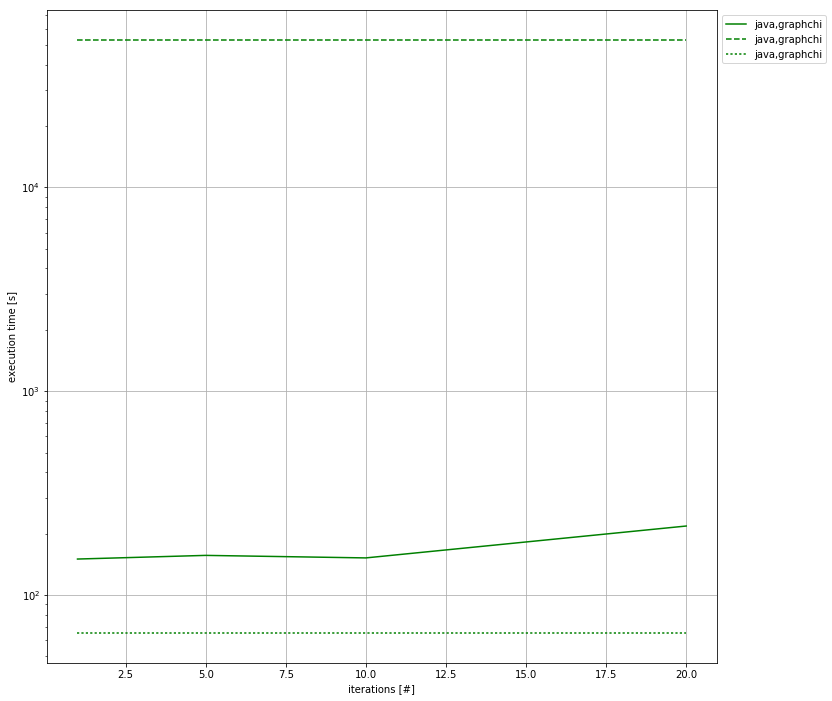

In [55]:
def keyfunc(exp): return exp.conf('plugins')
def xfunc(exp): return exp.conf('iterations')
def selfunc(exp): return '2016-08-12-a-crocopr' in exp.tags() and \
    exp.conf('input1') == u'hdfs://tenemhead2/data/rdf/dbpedia/dbpedia-2015/page-links-en-uris_de.sample_20pc.nt'

iteract = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement('Execution')['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterlo = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement('Estimate 1 (lower)')['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterhi = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement('Estimate 1 (upper)')['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)

plt.figure(figsize = (12, 12))
for series in iteract:
    plt.plot(series.x, series.y, color = plugin2color[series.key], label = str(series.title))
for series in iterhi:
    plt.plot(series.x, series.y, color = plugin2color[series.key], linestyle = '--', label = str(series.title))
for series in iterlo:
    plt.plot(series.x, series.y, color = plugin2color[series.key], linestyle = ':', label = str(series.title))
plt.yscale('log')
plt.xlabel('iterations [#]')
plt.ylabel('execution time [s]')
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

In [57]:
filesizes = {'hdfs://tenemhead2/data/rdf/dbpedia/dbpedia-2015/page-links-en-uris_de.sample_1pc.nt': 33.4,\
            'hdfs://tenemhead2/data/rdf/dbpedia/dbpedia-2015/page-links-en-uris_de.sample_5pc.nt': 167.,\
            'hdfs://tenemhead2/data/rdf/dbpedia/dbpedia-2015/page-links-en-uris_de.sample_10pc.nt': 334.2,\
            'hdfs://tenemhead2/data/rdf/dbpedia/dbpedia-2015/page-links-en-uris_de.sample_20pc.nt': 668.2,\
            'hdfs://tenemhead2/data/rdf/dbpedia/dbpedia-2015/page-links-en-uris_de.sample_50pc.nt': 1.63 * 1024,\
            'hdfs://tenemhead2/data/rdf/dbpedia/dbpedia-2015/page-links-en-uris_de.nt': 3.26 * 1024 }

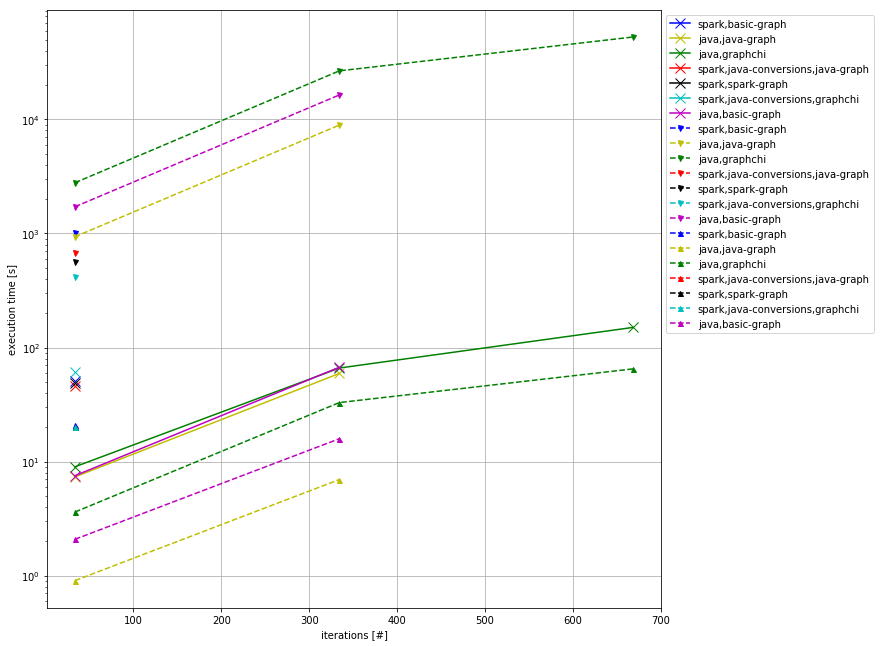

In [58]:
def keyfunc(exp): return exp.conf('plugins')
def xfunc(exp): return filesizes[exp.conf('input1')]
def selfunc(exp): return '2016-08-12-a-crocopr' in exp.tags() and exp.conf('iterations') == 1

iteract = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement('Execution')['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterlo = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement('Estimate 1 (lower)')['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterhi = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement('Estimate 1 (upper)')['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)

plt.figure(figsize = (11, 11))
for series in iteract:
    plt.plot(series.x, series.y, color = plugin2color[series.key], marker = 'x', markersize = 10, label = str(series.title))
for series in iterhi:
    plt.plot(series.x, series.y, color = plugin2color[series.key], linestyle = '--', marker = 'v', markersize = 5, label = str(series.title))
for series in iterlo:
    plt.plot(series.x, series.y, color = plugin2color[series.key], linestyle = '--', marker = '^', markersize = 5, label = str(series.title))
plt.yscale('log')
plt.xlabel('iterations [#]')
plt.ylabel('execution time [s]')
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

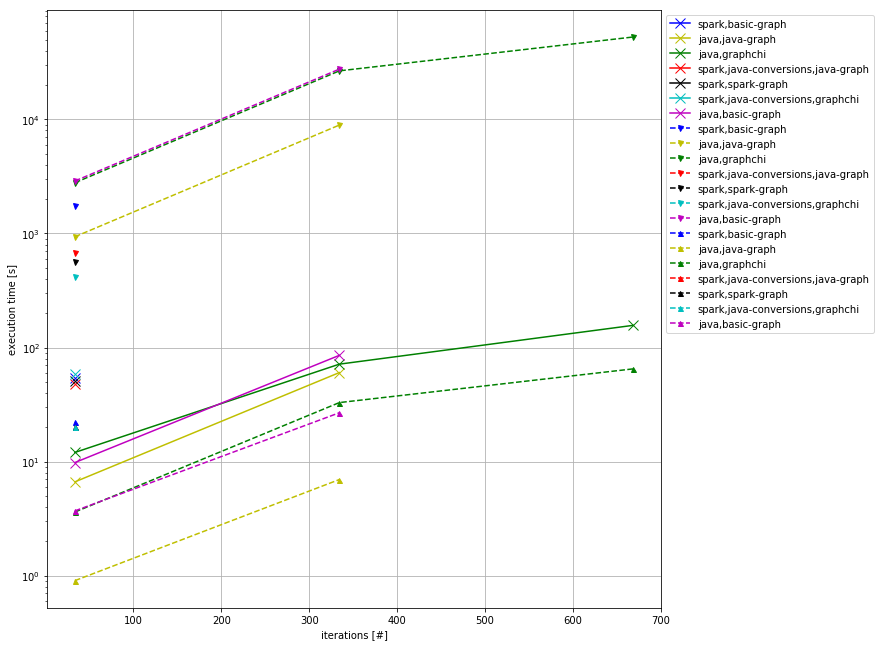

In [60]:
def keyfunc(exp): return exp.conf('plugins')
def xfunc(exp): return filesizes[exp.conf('input1')]
def selfunc(exp): return '2016-08-12-a-crocopr' in exp.tags() and exp.conf('iterations') == 5

iteract = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement('Execution')['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterlo = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement('Estimate 1 (lower)')['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterhi = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement('Estimate 1 (upper)')['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)

plt.figure(figsize = (11, 11))
for series in iteract:
    plt.plot(series.x, series.y, color = plugin2color[series.key], marker = 'x', markersize = 10, label = str(series.title))
for series in iterhi:
    plt.plot(series.x, series.y, color = plugin2color[series.key], linestyle = '--', marker = 'v', markersize = 5, label = str(series.title))
for series in iterlo:
    plt.plot(series.x, series.y, color = plugin2color[series.key], linestyle = '--', marker = '^', markersize = 5, label = str(series.title))
plt.yscale('log')
plt.xlabel('iterations [#]')
plt.ylabel('execution time [s]')
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

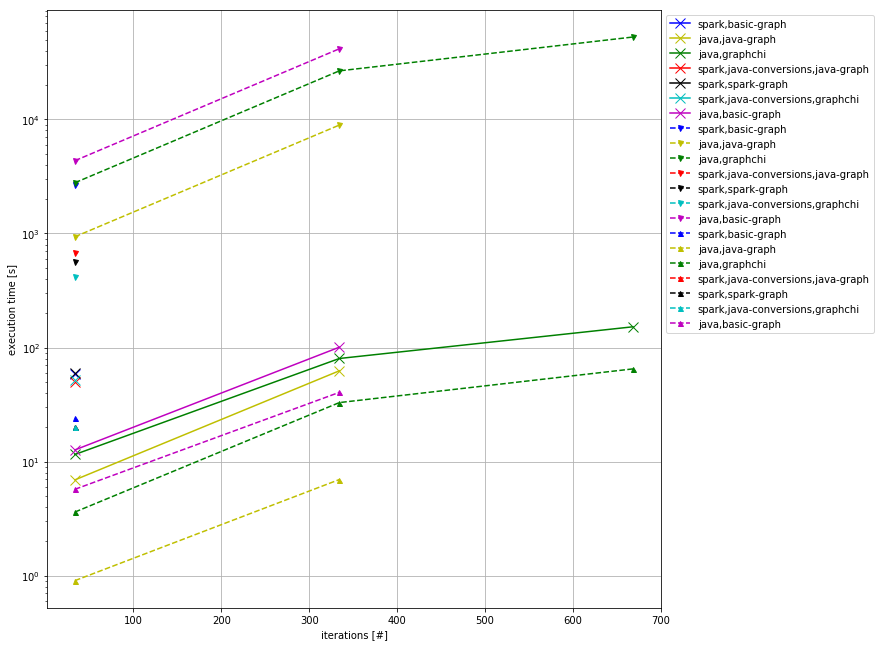

In [61]:
def keyfunc(exp): return exp.conf('plugins')
def xfunc(exp): return filesizes[exp.conf('input1')]
def selfunc(exp): return '2016-08-12-a-crocopr' in exp.tags() and exp.conf('iterations') == 10

iteract = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement('Execution')['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterlo = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement('Estimate 1 (lower)')['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterhi = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement('Estimate 1 (upper)')['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)

plt.figure(figsize = (11, 11))
for series in iteract:
    plt.plot(series.x, series.y, color = plugin2color[series.key], marker = 'x', markersize = 10, label = str(series.title))
for series in iterhi:
    plt.plot(series.x, series.y, color = plugin2color[series.key], linestyle = '--', marker = 'v', markersize = 5, label = str(series.title))
for series in iterlo:
    plt.plot(series.x, series.y, color = plugin2color[series.key], linestyle = '--', marker = '^', markersize = 5, label = str(series.title))
plt.yscale('log')
plt.xlabel('iterations [#]')
plt.ylabel('execution time [s]')
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

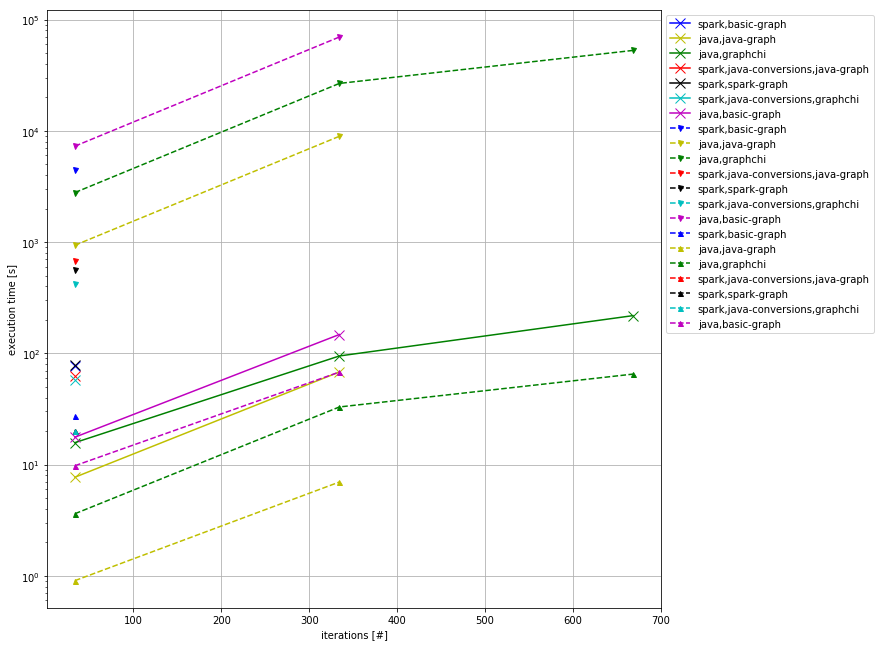

In [62]:
def keyfunc(exp): return exp.conf('plugins')
def xfunc(exp): return filesizes[exp.conf('input1')]
def selfunc(exp): return '2016-08-12-a-crocopr' in exp.tags() and exp.conf('iterations') == 20

iteract = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement('Execution')['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterlo = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement('Estimate 1 (lower)')['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)
iterhi = profiledb.multipleseries(keyfunc, xfunc, yfunc = lambda exp: exp.measurement('Estimate 1 (upper)')['millis'] / 1000,\
                                     selfunc = selfunc,\
                                     groupfunc = pdb.median)

plt.figure(figsize = (11, 11))
for series in iteract:
    plt.plot(series.x, series.y, color = plugin2color[series.key], marker = 'x', markersize = 10, label = str(series.title))
for series in iterhi:
    plt.plot(series.x, series.y, color = plugin2color[series.key], linestyle = '--', marker = 'v', markersize = 5, label = str(series.title))
for series in iterlo:
    plt.plot(series.x, series.y, color = plugin2color[series.key], linestyle = '--', marker = '^', markersize = 5, label = str(series.title))
plt.yscale('log')
plt.xlabel('iterations [#]')
plt.ylabel('execution time [s]')
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)